In [1]:
# Import required packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import math
import matplotlib.patches as mpatches

For this homework, I decided to write a function which computes the power to detect a significant difference in the average value between two populations (two-sample t-test power analysis). The steps of the simulation are as follows:

1. The user specifies the population mean and standard deviation in the two samples of interest, and also specifies the sample sizes in the simulated experiments.
2. The user specifies the number of simulated experiments to run, denoted $b$.
2. For each group, $g$, $n_g$ draws are simulated from $N(\mu_g, \sigma^2_g)$.
3. A two-sample t-test is performed between the two samples and the p-value is stored.
4. Steps 2 and 3 are repeated $b$ times
5. The estimated power ($1 - \beta$) is the proportion of times $p < 0.05$ among all the simulated experiments 

In [2]:
mu1 = 180    # Population mean in group 1
mu2 = 150    # Population mean in group 2
sigma_1 = 30 # SD of population 1
sigma_2 = 30 # SD of population 2
n1 = 100     # Sample size in group 1
n2 = 100     # Sample size in group 2
b = 10000    # Number of simulated experiments

In [3]:
def power_t_test(mu1, mu2, sigma_1, sigma_2, n1, n2, b=1000):
    """
        This function computes the power to detect a significant
        difference between two group means, given the means
        in each group, their standard deviations, and sample sizes.
        
        Inputs
            mu1, mu2         - The mean of the distrubution in the first and second groups, respectively
            sigma_1, sigma_2 - The standard deviation of the distribution in the first and second groups
            n1, n2           - Sample sizes in group 1 and 2, respectively
        
        Returns:
            The function returns the power of the test (i.e., proportion of simulated
            experiments resulting in a p-value < 0.05)
    """
    
    # Initiate two lists which will hold the p-values
    # and test statistics
    pvals, test_stats = [None] * b, [None] * b
    
    for i in range(0, b):
        
        # Simulate a draw of n1 samples from a N(mu1, sigma_1**2)
        x = np.random.normal(loc=mu1, scale=sigma_1, size=n1)
        
        # Simulate a draw of n2 samples from a N(mu2, sigma_2**2)
        y = np.random.normal(loc=mu2, scale=sigma_2, size=n2)
        
        # Perform t-test on simulated draws
        result = stats.ttest_ind(x, y)
        
        # Store p-vals and test statistic
        pvals[i] = result.pvalue
        test_stats[i] = result.statistic
    
    # Compute the proportion of all the tests
    # rejecting the null hypothesis
    power = np.mean([i < 0.05 for i in pvals])
    
    return({'power': power, 'p-vals': pvals, 'statistics': test_stats})

In [4]:
# Perform power analysis using the parameters specified above
results = power_t_test(mu1, mu2, sigma_1, sigma_2, 20, 20)

The power of the test with the specified sample sizes, means, and stadnard deviations is below.

In [5]:
# Take a look at the power
results['power']

0.852

Often times we are interested in figuring out how many samples we need in each group to detect a certain effect size with sufficient power. Here, We'll use the same means and standard deviations as above but we will increase the sample size from 5 all the way up to 155. Furthermore, we're interested in seeing the sample size needed for a power of 80%.

In [6]:
n_power = [None] * 151
for i in range(0, 151):
    n_power[i] = power_t_test(mu1, mu2, sigma_1, sigma_2, i + 5, i + 5)['power']

In [7]:
# Honestly I don't really know what's going on here. I just wanted to find the index for the first instance in which
# the power >= 0.8, then add 5. I found this solution here:
# https://stackoverflow.com/questions/2236906/first-python-list-index-greater-than-x?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
n_power_80 = next(x[0] for x in enumerate(n_power) if x[1] >= 0.8) + 5
power_achieved = n_power[n_power_80 - 5]

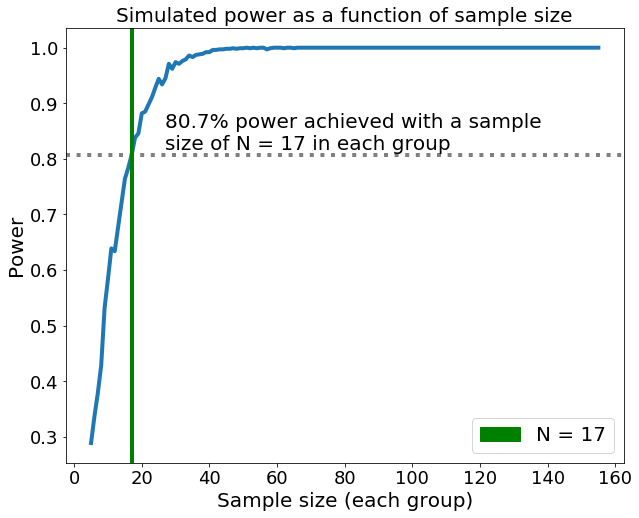

In [8]:
# Generate the plot. This plots the simulated power as a function of increasing sample size.
plt.figure(figsize=(10,8))
plt.plot([i + 5 for i in range(0, 151)], n_power, linewidth=4)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('Sample size (each group)', size = 20)
plt.ylabel('Power', size = 20)
plt.axhline(power_achieved, linestyle=':', color='grey', linewidth=4)
plt.axvline(n_power_80, color='green', linewidth=4)
plt.title('Simulated power as a function of sample size', size=20)
plt.annotate(
# Label and coordinates
'%s%% power achieved with a sample\nsize of N = %s in each group' % (power_achieved * 100, n_power_80),
    xy=(n_power_80, power_achieved), xytext=(n_power_80 + 10, power_achieved + 0.01),
    size=20
)
plt.rcParams["legend.fontsize"] = 20
green_patch = mpatches.Patch(color='green', label='N = %s' % n_power_80)
plt.legend(handles=[green_patch])
plt.show()